In [39]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [5]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0] #9 => Ankle boot

9

In [7]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

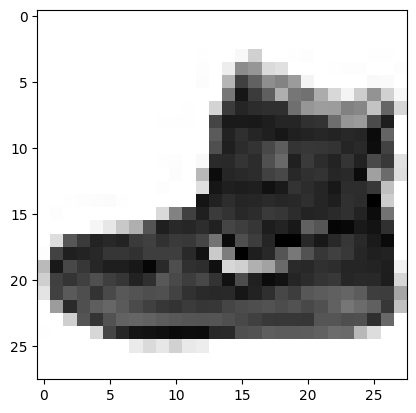

In [12]:
plt.imshow(X_train[0], cmap='Greys')

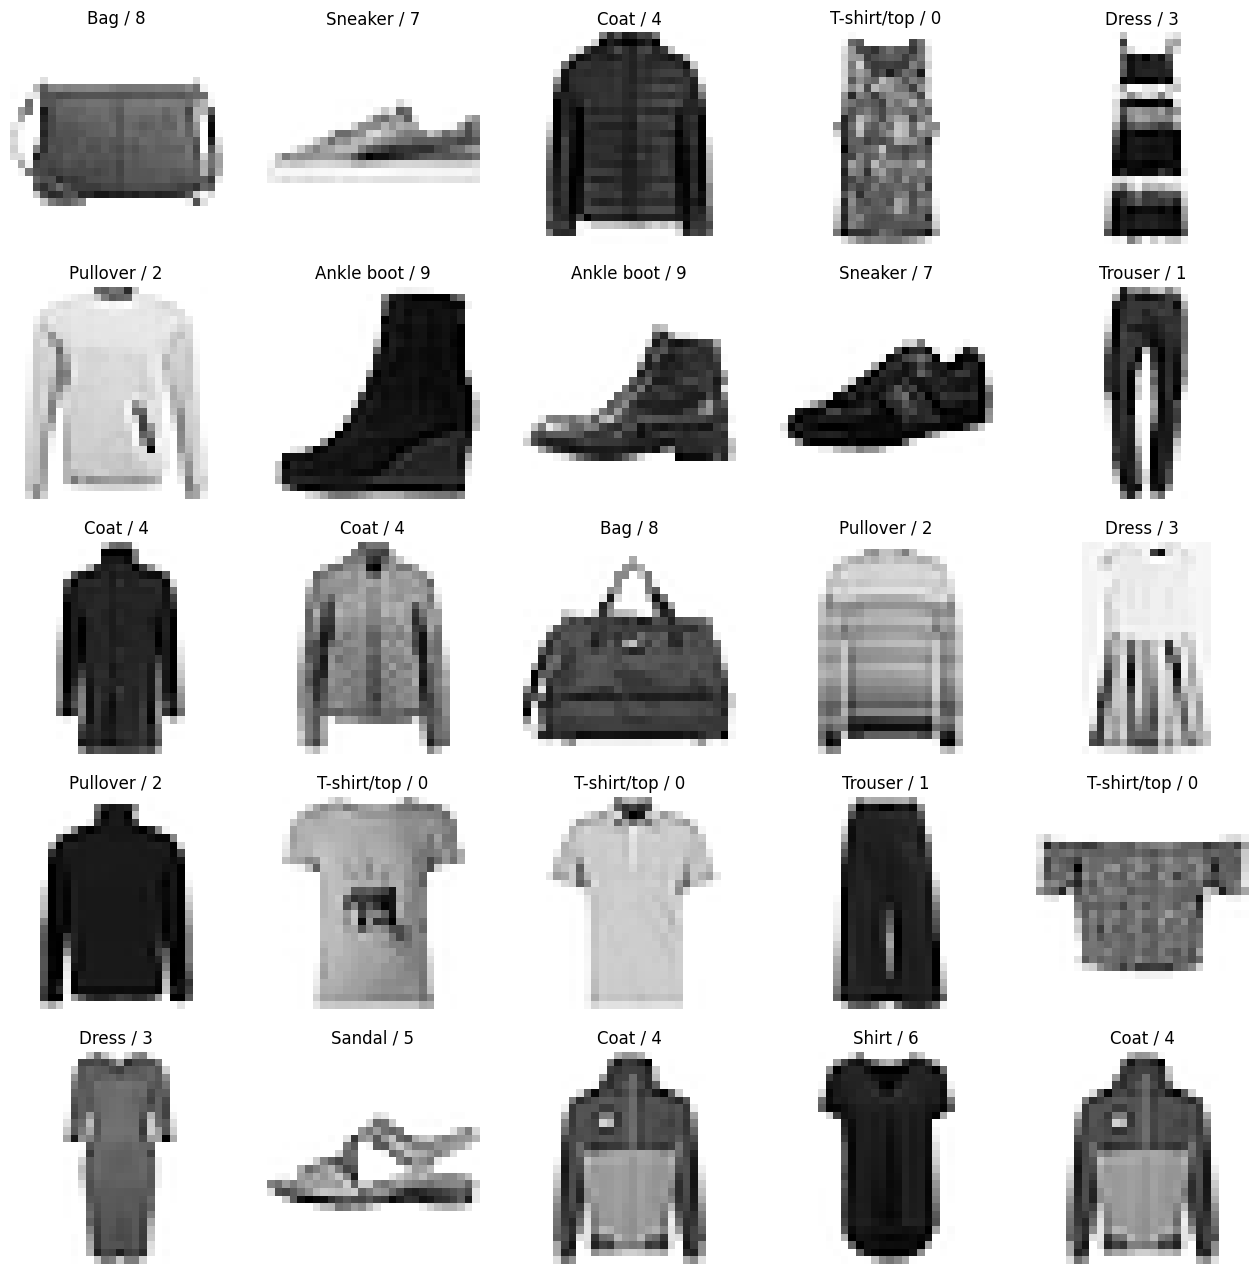

In [20]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25): # array of 25 numbers
  plt.subplot(5,5,j); j+=1 # 5 rows, 5 columns
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train.ndim

3

In [23]:
# tensor_shape = (BATCH_SIZE, WIDTH, HEIGHT, CHANNELS). (Expected)
X_train = np.expand_dims(X_train, -1) # add at index -1 means add at last
X_test = np.expand_dims(X_test, -1)

In [24]:
X_train.shape

(60000, 28, 28, 1)

In [25]:
# Feature scaling
X_train = X_train/255
X_test = X_test/255

In [27]:
# separating validation data from training data
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2024)

In [28]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [29]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

C:\Users\Chirag Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn_model.summary() # get the summary of model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.6896 - loss: 0.9521 - val_accuracy: 0.8478 - val_loss: 0.4304
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.8590 - loss: 0.4008 - val_accuracy: 0.8707 - val_loss: 0.3708
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.8812 - loss: 0.3408 - val_accuracy: 0.8822 - val_loss: 0.3293
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8884 - loss: 0.3130 - val_accuracy: 0.8894 - val_loss: 0.3120
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9007 - loss: 0.2832 - val_accuracy: 0.8935 - val_loss: 0.2943
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9045 - loss: 0.2674 - val_accuracy: 0.8987 - val_loss: 0.2825
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9101 - loss: 0.2528 - val_accuracy: 0.8992 - val_loss: 0.2736
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9143 - loss: 0.2429 - val_accuracy: 0.8996 - 

In [33]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.93, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.27, 0.09, 0.01]], dtype=float32)

In [34]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8922 - loss: 0.2970


[0.2898670732975006, 0.8935999870300293]

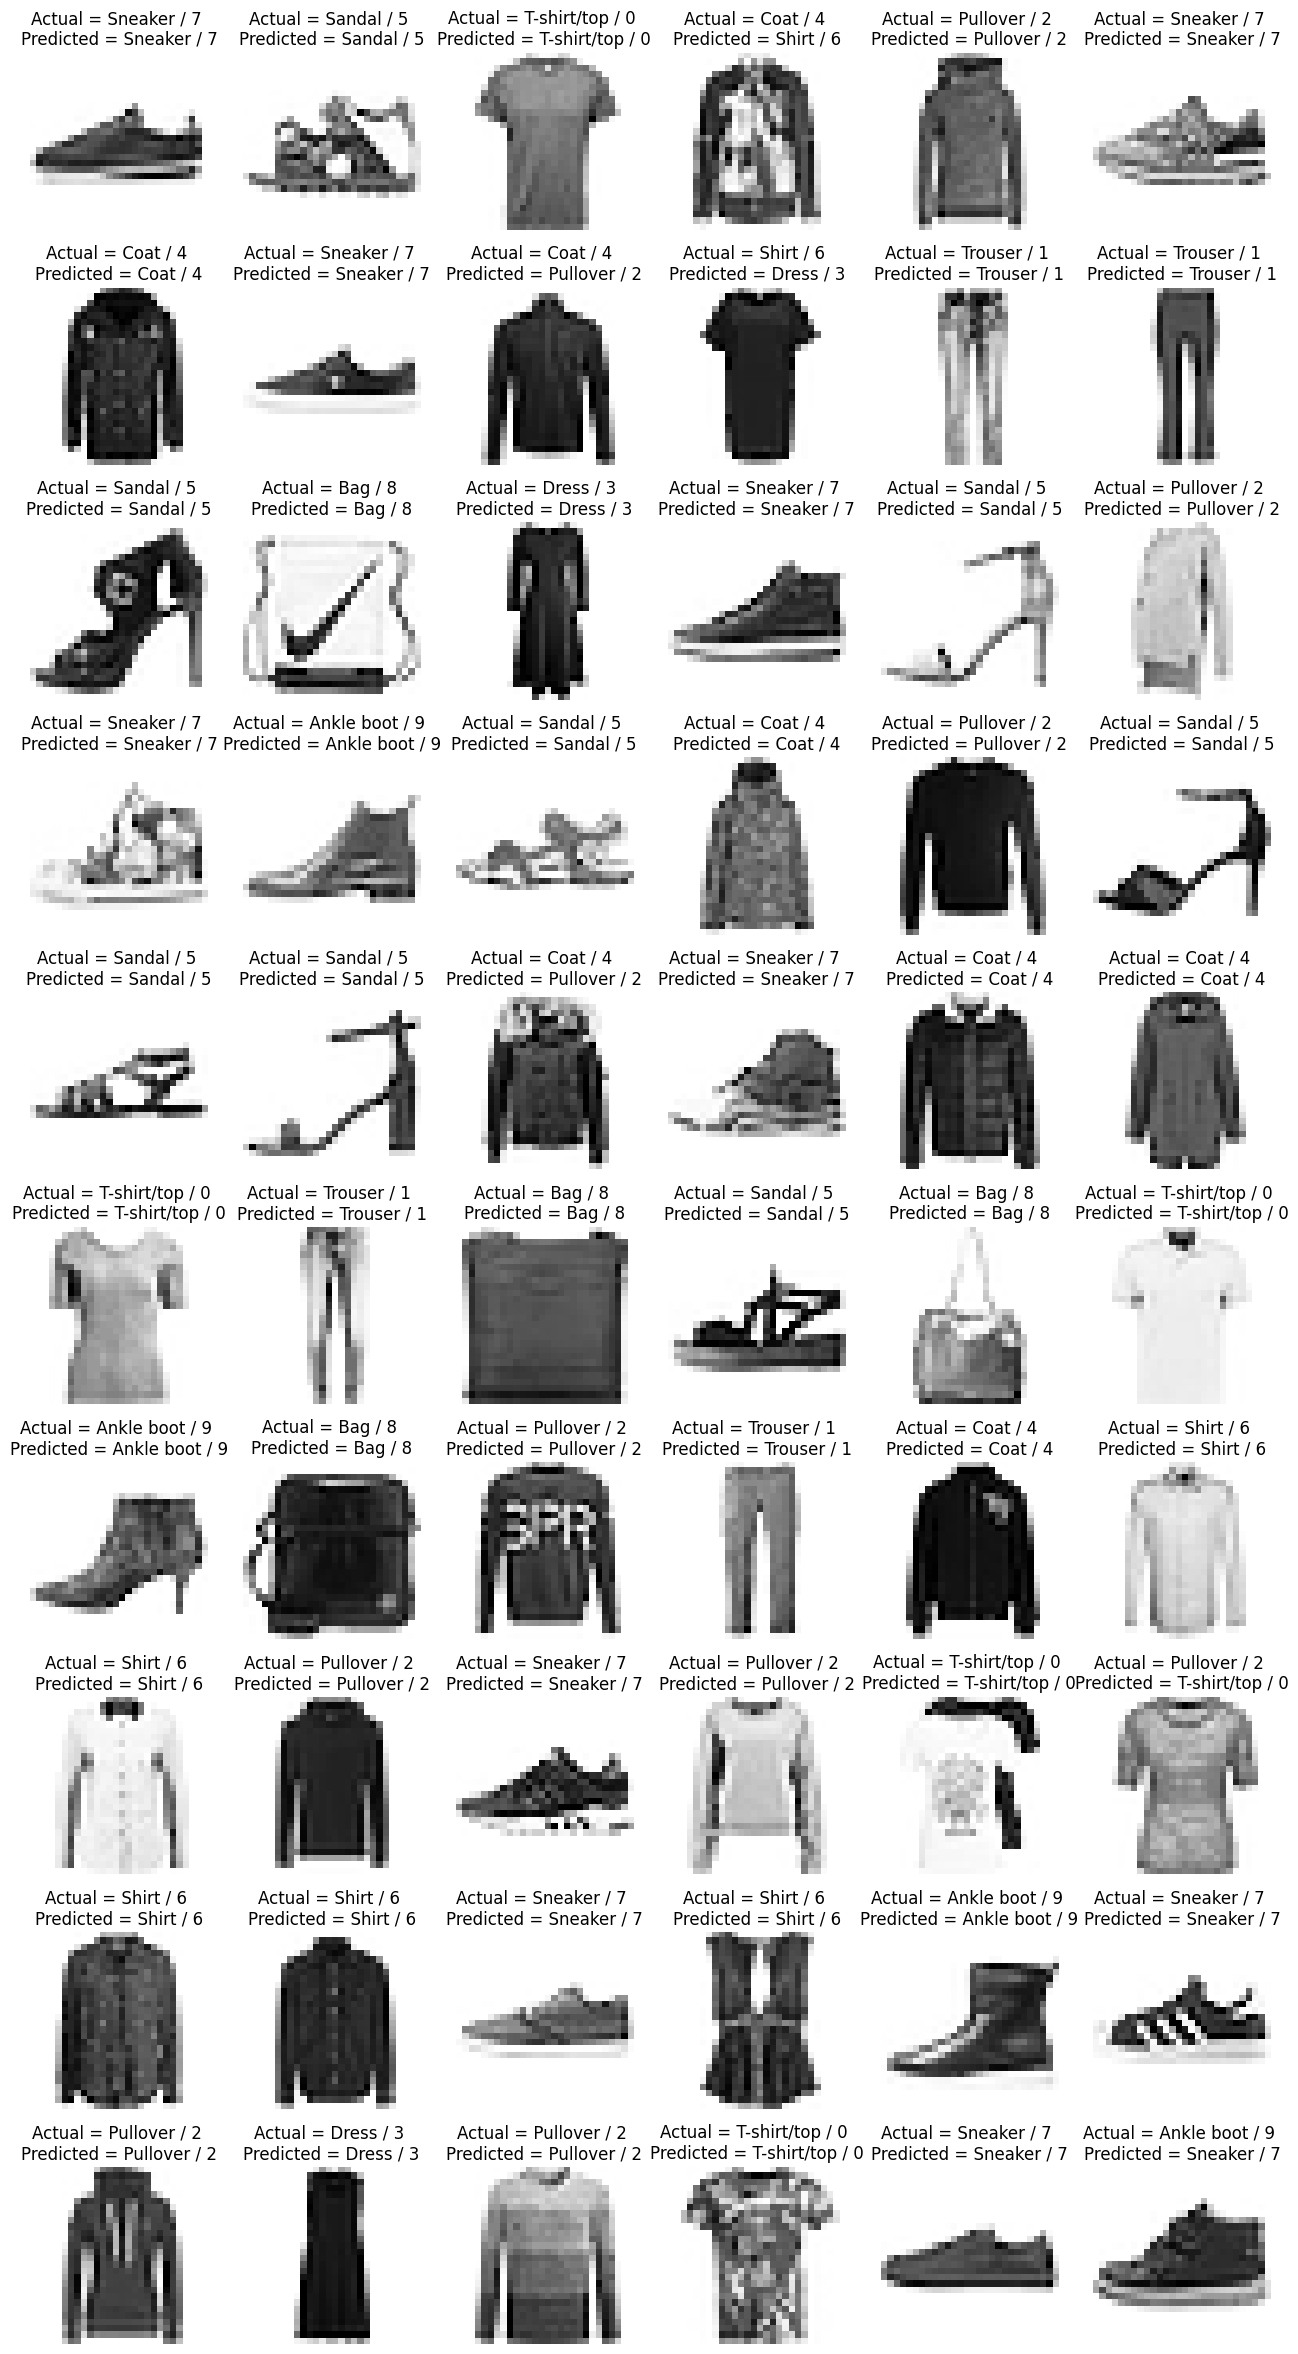

In [36]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<Axes: >

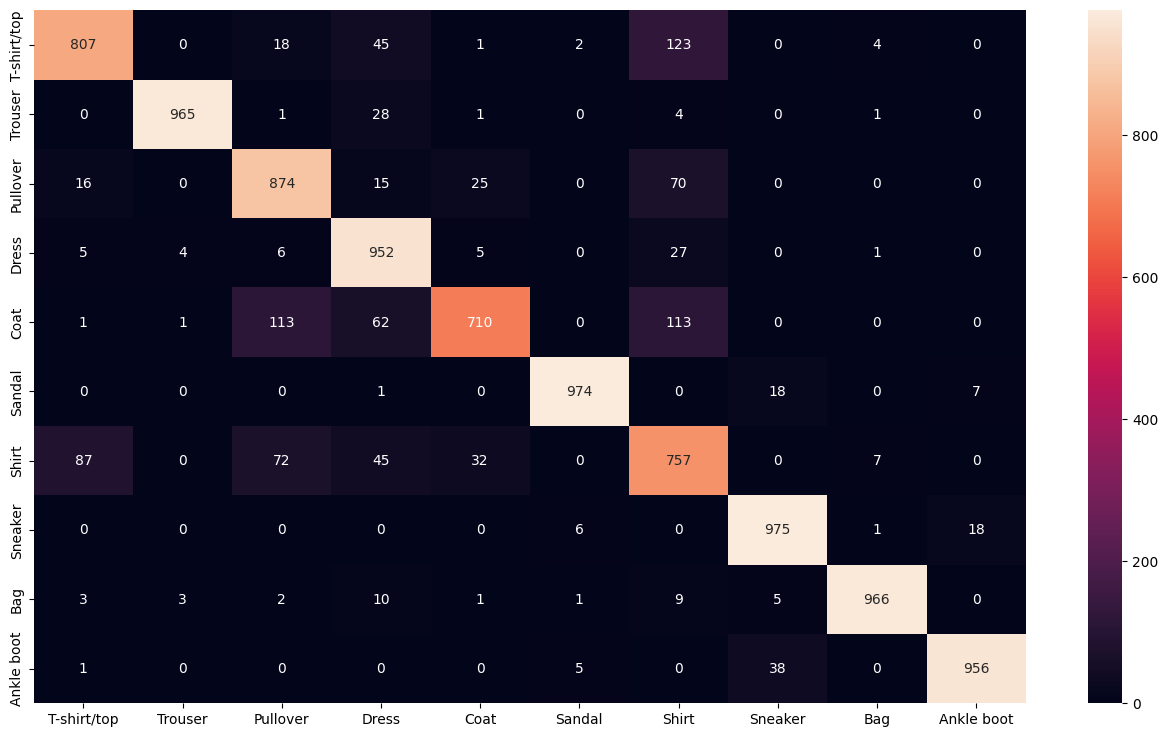

In [40]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [41]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.81      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.80      0.87      0.84      1000
       Dress       0.82      0.95      0.88      1000
        Coat       0.92      0.71      0.80      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.69      0.76      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [42]:
cnn_model.save('fashion_mnist_cnn_model1.keras') # Save model

In [43]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model1.keras')

In [44]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [45]:
np.argmax(Y_pred_sample[0])

9

In [46]:
y_test[0]

9

In [47]:
# Building a more complex CNN Model
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

C:\Users\Chirag Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.4474 - loss: 1.4965 - val_accuracy: 0.7674 - val_loss: 0.5879
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.7733 - loss: 0.5921 - val_accuracy: 0.8259 - val_loss: 0.4727
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8193 - loss: 0.4785 - val_accuracy: 0.8565 - val_loss: 0.3949
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.8477 - loss: 0.4119 - val_accuracy: 0.8691 - val_loss: 0.3556
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8602 - loss: 0.3739 - val_accuracy: 0.8792 - val_loss: 0.3271
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8722 - loss: 0.3497 - val_accuracy: 0.8811 - val_loss: 0.3251
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8803 - loss: 0.3267 - val_accuracy: 0.8848 - val_loss: 0.3143
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8842 - loss: 0.3100 - val_accuracy: 0.8925 - v

In [50]:
cnn_model2.save('fashion_mnist_cnn_model2.keras')

In [51]:
#Building CNN model(Even more complex)
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [52]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 144ms/step - accuracy: 0.3505 - loss: 1.6577 - val_accuracy: 0.7565 - val_loss: 0.6344
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.7564 - loss: 0.6381 - val_accuracy: 0.8144 - val_loss: 0.4910
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.8065 - loss: 0.5106 - val_accuracy: 0.8418 - val_loss: 0.4247
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.8388 - loss: 0.4378 - val_accuracy: 0.8673 - val_loss: 0.3559
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.8656 - loss: 0.3754 - val_accuracy: 0.8788 - val_loss: 0.3360
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.8781 - loss: 0.3414 - val_accuracy: 0.8875 - val_loss: 0.3094
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.8890 - loss: 0.3141 - val_accuracy: 0.8943 - val_loss: 0.3018
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.8953 - loss: 0.2954 - val_accu

In [54]:
cnn_model3.save('fashion_mnist_cnn_model3.keras')

In [56]:
cnn_model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8998 - loss: 0.5315


[0.5167397260665894, 0.902899980545044]

In [57]:
y_pred2 = cnn_model2.predict(X_test)
y_pred2.round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.  , 0.  ]], dtype=float32)

In [58]:
y_pred3 = cnn_model3.predict(X_test)
y_pred3.round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
cnn_model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9083 - loss: 0.2679


[0.2661221921443939, 0.9070000052452087]

In [60]:
cnn_model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8998 - loss: 0.5315


[0.5167397260665894, 0.902899980545044]

<Axes: >

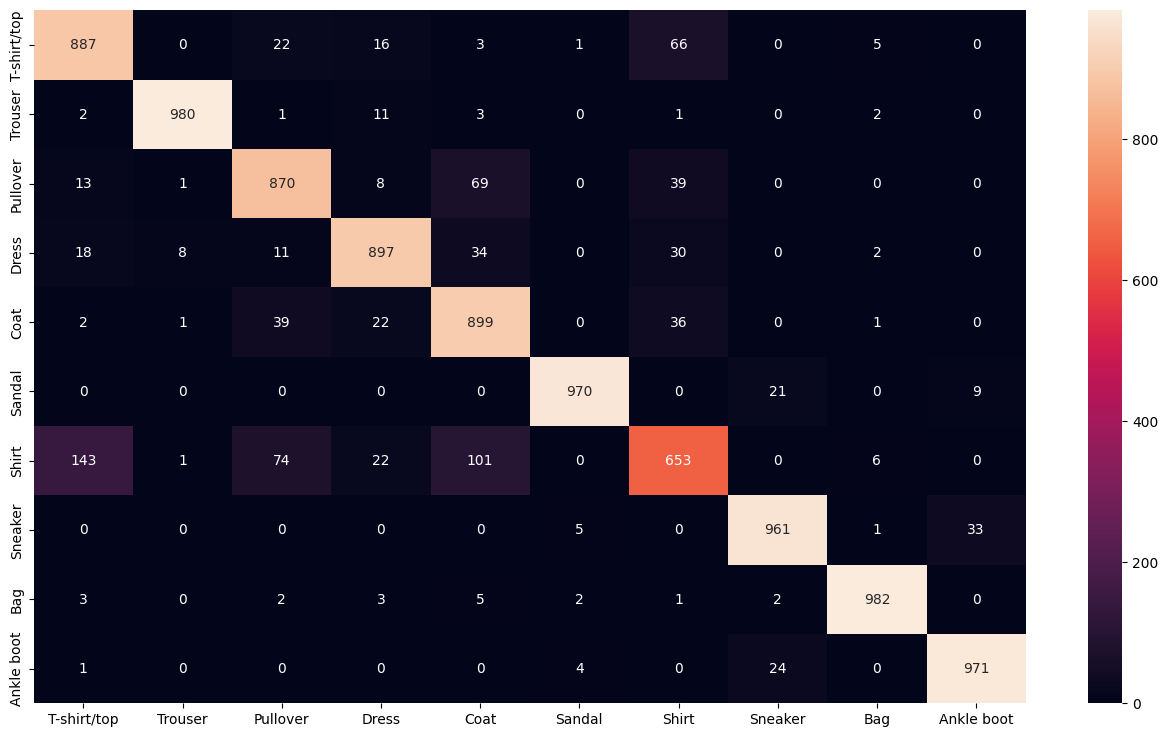

In [61]:
plt.figure(figsize=(16,9))
y_pred_labels2 = [ np.argmax(label) for label in y_pred2 ]
cm2 = confusion_matrix(y_test, y_pred_labels2)

# show cm 
sns.heatmap(cm2, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

<Axes: >

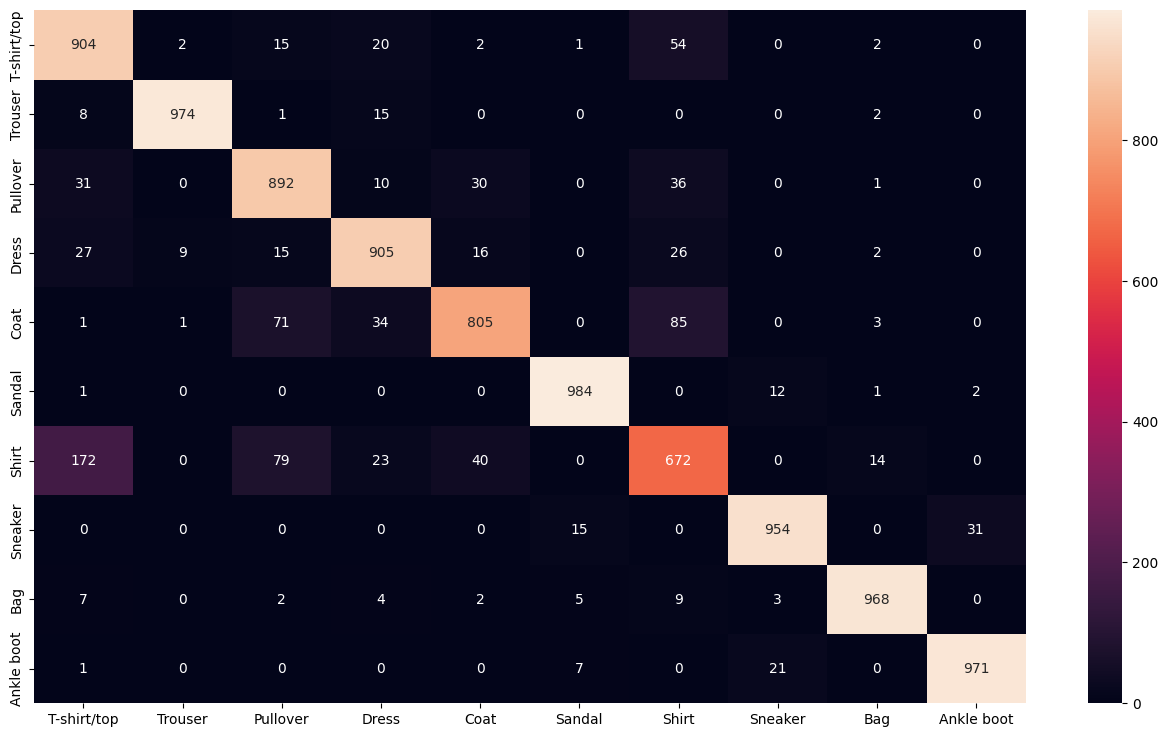

In [62]:
plt.figure(figsize=(16,9))
y_pred_labels3 = [ np.argmax(label) for label in y_pred3 ]
cm3 = confusion_matrix(y_test, y_pred_labels3)

# show cm 
sns.heatmap(cm3, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [63]:
cr2= classification_report(y_test, y_pred_labels2, target_names=class_labels)
print(cr2)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.87      0.86      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.81      0.90      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.79      0.65      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [64]:
cr3= classification_report(y_test, y_pred_labels3, target_names=class_labels)
print(cr3)

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.90      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.89      0.86      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.90      0.81      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.76      0.67      0.71      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

